In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

# Bulls Eye Problem - Simulation
    Suppose a person hits the bulls eye with probability 0.7. 
    Calculate the probability of person hitting atleast one bulls eye varying with no of hits.
    Solve using Simulation

In [34]:
# Bull eye problem
num_hits = np.arange(2,100)
n_expt_per_n = 10000

expt_values = []
for i in num_hits:  
    x = np.random.choice(['Y','N'],p=[0.7,0.3],size = (n_expt_per_n,i))
    expt_outcomes = []
    for j in x:
        found = 0
        count_Y = list(j).count('Y')
        if count_Y> 1:
            found += 1
        expt_outcomes.append(found)
    expt_values.append(sum(expt_outcomes)/len(expt_outcomes))

# np.interp()

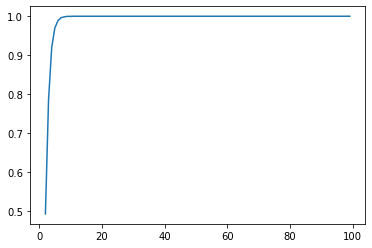

In [35]:
plt.plot(num_hits,expt_values)

# Election win across country Simulation
    Suppose there are 50 states and two parties Red and White. A party wins the entire election of country if it wins in more than 50% states. Calculate probability of winning red in less than 45% of the states using simulation

In [23]:
outcomes, sims = [], 100000
for _ in range(sims):
    probs = np.random.rand(50)
    # Simulate elections in the 50 states
    election = np.random.binomial(p=probs, n=1)
    # Get average of Red wins and add to `outcomes`
    outcomes.append(election.mean())

# Calculate probability of Red winning in less than 45% of the states
prob_red_wins = sum([(x < 0.45) for x in outcomes])/len(outcomes)
print("Probability of Red winning in less than 45% of the states = {}".format(prob_red_wins))

Probability of Red winning in less than 45% of the states = 0.23847


# Monty Hall using Simulation

In [40]:
#Monty Hall-not changing decision
win=[]
sims = 100000
for _ in range(sims):
    goat = [0]*3
    n = np.random.choice([0,1,2])
    goat[n] = 1
    user_choice = np.random.choice([0,1,2])
    if goat[user_choice] == 1:
        win.append(1)
print('Probability of winning when player never switches gate',np.sum(win)/sims) 

Probability of winning when player never switches gate 0.33392


In [41]:
#Monty Hall - always changing decision
win=[]
sims = 100000
for _ in range(sims):
    goat = [0]*3
    n = np.random.choice([0,1,2])
    goat[n] = 1
    user_choice = np.random.choice([0,1,2])
    if user_choice == n:
        continue
    else:
        win.append(1)
print('Probability of winning when player always switches gate',np.sum(win)/sims)

Probability of winning when player always switches gate 0.66665


# Problem
    One hundred people line up to board an airplane. 
    Each has a boarding pass with assigned seat. 
    However, the first person to board has lost his boarding pass and takes a random seat. 
    After that, each person takes 
        1. the assigned seat if it is unoccupied
        2. one of unoccupied seats at random if occupied
    What is the probability that the last person to board gets to sit in
    his assigned seat?
        
    Extension: Increase the number of people loosing boarding pass

In [24]:
import numpy as np
prob = []
sims = 100000
for k in range(1,10):                           #no of persons who lost boarding pass
    count = 0
    for _ in range(sims):                       #simulations
        seats = np.zeros(100)                   # to take care of occupied and unoccupied seats
        people_seat_nos = list(range(1,101))    #assigning seats to people
        np.random.shuffle(people_seat_nos)      #randomizing the incoming people for more real world
        seats[np.random.randint(1,101,k)-1] = 1 #first k persons taking random seat
        people_seat_nos = people_seat_nos[k:]   #leaving out k initial passengers
        for i in people_seat_nos[:-1]:          #leaving last passengers to check if he gets the seat or not
            if seats[i-1] == 0:                 # if allotted seat is not occupied
                seats[i-1] = 1
            else:
                #choosing random unoccopied seat as the allotted seat is occupied
                rand_unocc_seat = np.random.choice(np.where(seats == 0)[0])
                seats[rand_unocc_seat] = 1      #occupying the random seat
        if seats[people_seat_nos[-1]-1] == 0:   #checking last person getting his allotted seat or not
            count += 1
    prob.append(count/sims)

Text(0.5, 0, 'No of persons lost boarding pass')

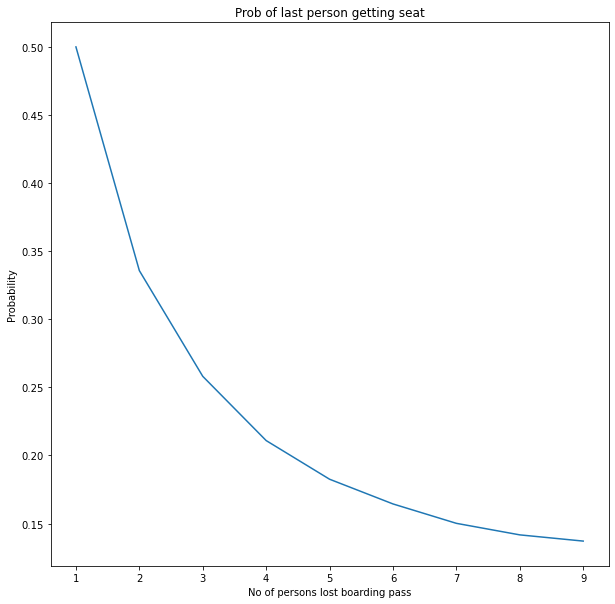

In [25]:
plt.figure(figsize=(10,10))
plt.plot(range(1,10),prob)
plt.title('Prob of last person getting seat')
plt.ylabel('Probability')
plt.xlabel('No of persons lost boarding pass')

# Conclusions:
    1. Independent of the number of seats or passengers
    2. Independent of the order of the passengers coming in
    3. Even if the first person lost the boarding pass, still only 50% chance that last person will get seat
    4. Probability of last person getting seat increases after 15 persons loosing boarding pass
    5. If only first person lost boarding pass, then the last person will eventually get either the actual seat no        of the person who lost boarding pass or his own seat. i.e. he has just two options among which only 1 is          satisfying . Hence the probability is 1/2 = 0.5